In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
print(mnist_train_images.shape[0])
print(mnist_test_images.shape[0])

60000
10000


In [3]:
if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
mnist_test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)
mnist_train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)

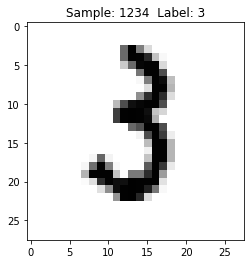

In [5]:
def display_sample(num):
    label = mnist_train_labels[num].argmax(axis=0)
    # Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28, 28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, mnist_train_labels,
                    batch_size=32,
                    epochs=5,
                    verbose=2,
                    validation_data=(test_images, mnist_test_labels))

Epoch 1/5
1875/1875 - 13s - loss: 0.1930 - accuracy: 0.9420 - val_loss: 0.0534 - val_accuracy: 0.9830
Epoch 2/5
1875/1875 - 13s - loss: 0.0820 - accuracy: 0.9763 - val_loss: 0.0396 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 - 13s - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0332 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 - 13s - loss: 0.0523 - accuracy: 0.9846 - val_loss: 0.0297 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 - 12s - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0308 - val_accuracy: 0.9912


In [9]:
score = model.evaluate(test_images, mnist_test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03080040216445923
Test accuracy: 0.9911999702453613


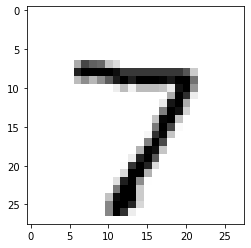

In [10]:
img = np.reshape(test_images[0], (28, 28))
plt.imshow(img, cmap=plt.get_cmap('gray_r'))
plt.show()

In [11]:
img = np.reshape(test_images[0], (1, 28, 28, 1))
pred = model.predict(img)
pred = np.argmax(pred)
pred

7